# 04. PyTorch Custom Datasets Video Notebook

We've used some datasets with PyTorch Before.

But how do you get your own data into PyTorch?

One of the ways to do so is via: datasets

## Domain libraries

### 1. Get data

New important point:
* zipfile


In [1]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it
if image_path.is_dir():
  print(f"{image_path} directory already exist, skipping it ......")
else:
  print(f"{image_path} directory already exist, creating it ......")
  image_path.mkdir(parents=True, exist_ok=True)

dataset_zip = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  print("Downloading pizza, steak, sushi image for our dataset....")
  f.write(dataset_zip.content)

with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping the downloaded file ...... ")
  zip_ref.extractall(image_path)


data/pizza_steak_sushi directory already exist, creating it ......
Unzipping the downloaded file ...... 


In [2]:
import os
def work_through_file(dir_path):
  """
  TODO: Walks through dir_path returning its contents.
  Args:
    dir_path(str or pathlib.Path): target directory
  Returns:
    A Print out of:
      number of subdirectories in dir_path
      number of image in each subdirectory
      name of each subdirectory
  """

  for dirpath, dirnames, filenames in os.walk(dir_path):
      print(f"There are {len(dirnames)} directories and {len(filenames)} images in path:{dirpath}")

In [3]:
work_through_file(image_path)

There are 2 directories and 0 images in path:data/pizza_steak_sushi
There are 3 directories and 0 images in path:data/pizza_steak_sushi/test
There are 0 directories and 25 images in path:data/pizza_steak_sushi/test/pizza
There are 0 directories and 19 images in path:data/pizza_steak_sushi/test/steak
There are 0 directories and 31 images in path:data/pizza_steak_sushi/test/sushi
There are 3 directories and 0 images in path:data/pizza_steak_sushi/train
There are 0 directories and 78 images in path:data/pizza_steak_sushi/train/pizza
There are 0 directories and 75 images in path:data/pizza_steak_sushi/train/steak
There are 0 directories and 72 images in path:data/pizza_steak_sushi/train/sushi


## 2.1 Visualizing and image
Let's write some code to:



1. Get all of the image paths
2. Pick a random image path using Python's `random.choice()`
3. Get the image class name using `pathlib.Path.parent.stem`
4. Open the image
  *  with **PIL**
  *  with `matplotlib.pyplot`: At first, you have to convert the image into array from 'jpg' using `np.asarray`


sushi
random image path: data/pizza_steak_sushi/test/sushi/3177743.jpg
Image class: sushi
Image height: 512
Image width: 512


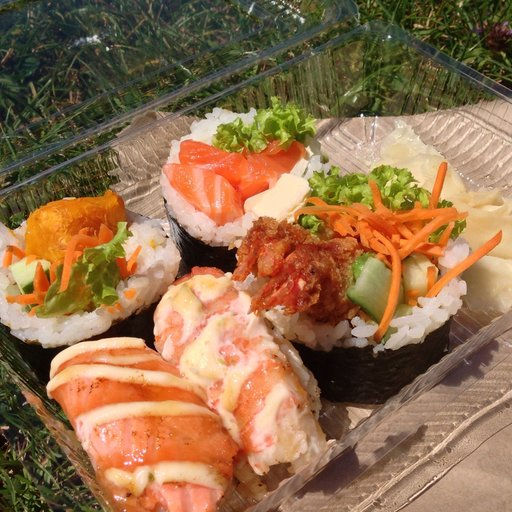

In [4]:
import random
from PIL import Image

# Set the ramdom seed
#random.seed(42)

# Get all image path(* means any combination)
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Pick a random image path
random_image_path = random.choice(image_path_list)

# Get image class from path name
image_class = random_image_path.parent.stem
print(image_class)

# open the image
img = Image.open(random_image_path)

# Take a look the image and metadata
print(f"random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img


In [5]:
# Visualize the image with matplotlib.pyplot

The class is sushi | Image shape: (512, 512, 3)


(-0.5, 511.5, 511.5, -0.5)

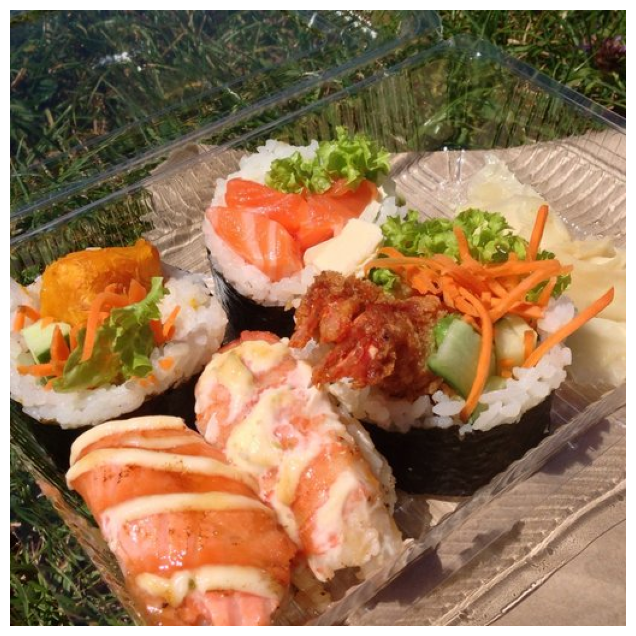

In [6]:
import numpy as np
import matplotlib.pyplot as plt
img_as_array = np.asarray(img)
plt.figure(figsize=(10,8))
plt.imshow(img)
print(f"The class is {image_class} | Image shape: {img_as_array.shape}")
plt.axis(False)

# 3. Transforming data

Before we can use our image with PyTorch:
1. Turn your target data into tensors
2. Turn it into a `torch.untils.data.Dataset` and subsequently a `DataLoader`

In [7]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

In [8]:
# Write a transform for image
data_transform = transforms.Compose([
    # Resize the image to 64 * 64
    transforms.Resize(size=(64, 64)),
    # Filp the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # tranform our image to tensor
    transforms.ToTensor()
])

In [9]:
img_tensor=data_transform(img).permute(1, 2, 0)
img_tensor.shape

torch.Size([64, 64, 3])

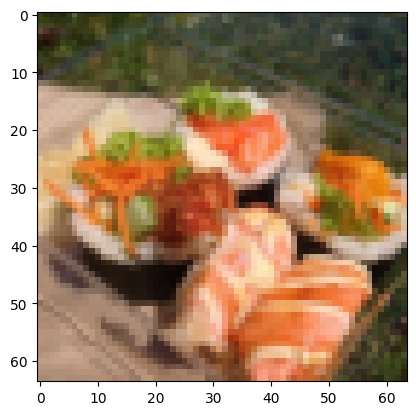

In [10]:
plt.imshow(img_tensor)

## 3.1 Visualize what's happenin' after we tranform the image to tensor

In [11]:
def plot_transform_image(image_path,
                         transform,
                         n,
                         seed=None):
  if seed:
    random.seed(42)
  random_choice = random.sample(image_path, k=n)
  for choice in random_choice:
    with Image.open(choice) as f:
      fig, ax = plt.subplots(1, 2)
      ax[0].set_title(f"oringal\nSize:{f.size}")

      ax[0].imshow(f)
      ax[0].axis(False)

      # Transform and plot image
      # Note: permute() will change shape of image to suit matplotlib
      # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
      choice_tensor = transform(f).permute(1, 2, 0)
      ax[1].imshow(choice_tensor)
      ax[1].set_title(f"transformed image\nShape:{choice_tensor.shape}")
      ax[1].axis(False)




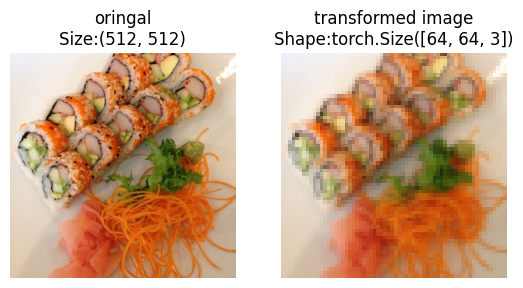

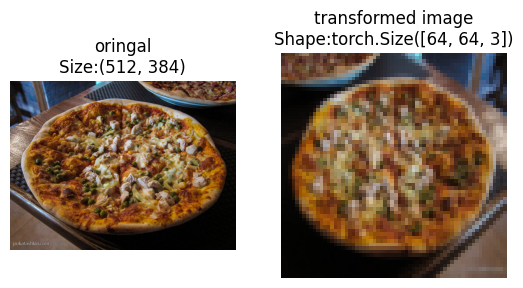

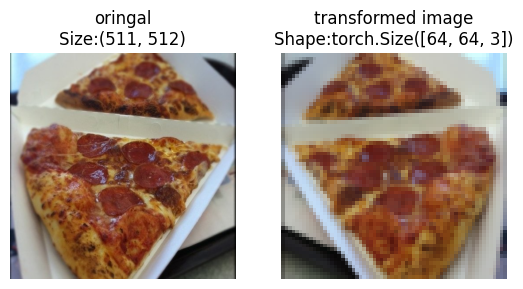

In [12]:
plot_transform_image(image_path_list,
                     transform=data_transform,
                     n=3,
                     seed=42)

## 4. Option 1: Loading image data using `ImageFolder`


In [13]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [14]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

In [15]:
len(train_data)

225

In [16]:
# Get the label/target from our train data
class_dict = train_data.class_to_idx
class_names = train_data.classes

In [17]:
# Index on the train data Dataset to get singel image
len(train_data[0])
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Iamge data type:{img.dtype}")
print(f"Image target:{label}")
print(f"Image label:{class_names[label]}")

Image tensor:
tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.09

## 4.1 Turn loaded images into `DataLoader`
A `DataLoader` is going to help us turn our `Dataset` into iterables and we can customise the `batch_size` so our model can see the `batch_size`  image at a time

In [18]:
# Turn train and test datasets into DataLoader
from torch.utils.data import DataLoader

BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count())

In [19]:
# Visualize what we got
img, label = next(iter(train_dataloader))
img.shape, label.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

## 5. Option 2: Load Image data with a custom `Dataset`

1. Want to be able to load images from file
2. Want to be able to get class names from the Dataset
3. Want to be able to get class dictionary from the Dataset

Pros:
* Can create a `Dataset` out of almost anything

* No limited to PyTorch pre-built `Dataset` functions

Cons:
* Even though you cloud create `Dataset` out of almost anything, it doesn't means it'll work
* Using a custom `Dataset` often results in us writing more code, which could be prone to errors or not peformaning well


### 5.1 Creating a helper funciton to get class names

We want a function to:
1. Get the clss names using `os.scandir()` to traverse a target directory

In [20]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [21]:
target_dictionary = train_dir

def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """
  Finds the class folder names in a target directory
  """
  # 1. Get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  # 2. Raise an error if class name could not be found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}... please try again after check it")

  # 3. Create a dictionary of index labels
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx




In [22]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom `Dataset` to replicate `ImageFolder`

To create our own custom dataset, we want to:
1. Subclass `torch.utils.data.Dataset`
2. Init our subclass with a target directory(the directory we'd like to get data from)
3. Create several attributes:
  * `paths` - paths of our images
  * `transform` - the transform we'd like to use
  * `classes` - a list of the target classes
  * `class_to_idx` - a dict of the target classes mapped to integer labels
4. Create a function to `load_images()`, this function will open an image
5. Overwrite the `__len()__` method to return the length of our dataset
6. Overwrite the `__getitem()__` method to return a given sample when passed an index


In [23]:
# 0. Write a custom dataset class
from torch.utils.data import Dataset

# 1. Subclass torch.untils.data.Dataset
class ImageFolderCustom(Dataset):
  # 2. Initialize our custom dataset
  def __init__(self,
               targ_dir: str,
               transform=None):
    # 3. Create class attribute
    # Get all of the image paths
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    # Setup transform
    self.transform = transform
    # Create classes and class_to_idx = find_classes(targ_dir)
    self.classes, self.class_to_idx = find_classes(targ_dir)

  # 4. Create a function to load images
  def load_image(self, index: int) -> Image.Image:
    """Open an image via a path and return it."""
    image_path = self.paths[index]
    return Image.open(image_path)

  # 5. Overwrite __len__()
  def __len__(self) -> int:
    """Return the total number of samples"""
    return len(self.paths)

  # 6. Overwrite __getitem__() method to return a particular sample
  def __getitem__(self, index: int) -> Tuple[torch.tensor, int]:
    """Return one sample of data, data and label (X,y)"""
    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]

    # Transform if necessary
    if self.transform:
      return self.transform(img), class_idx # return data, label (X, y)
    else:
      return img, class_idx



In [24]:
# Create a transform
train_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [25]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)

test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                      transform=test_transforms)




In [26]:
len(train_data_custom)

225

In [27]:
train_data_custom[0]


(tensor([[[0.2471, 0.2588, 0.2667,  ..., 0.1922, 0.2000, 0.1882],
          [0.2510, 0.2627, 0.2745,  ..., 0.2000, 0.2000, 0.1922],
          [0.2510, 0.2667, 0.2784,  ..., 0.2000, 0.2039, 0.1961],
          ...,
          [0.6078, 0.6314, 0.6588,  ..., 0.3608, 0.4118, 0.3922],
          [0.4588, 0.4588, 0.4784,  ..., 0.3843, 0.3725, 0.3647],
          [0.3804, 0.3529, 0.4118,  ..., 0.3961, 0.3922, 0.3647]],
 
         [[0.2275, 0.2392, 0.2471,  ..., 0.1804, 0.1882, 0.1765],
          [0.2314, 0.2431, 0.2549,  ..., 0.1882, 0.1882, 0.1804],
          [0.2314, 0.2471, 0.2588,  ..., 0.1922, 0.1922, 0.1843],
          ...,
          [0.1569, 0.1608, 0.1882,  ..., 0.2706, 0.3529, 0.3333],
          [0.1333, 0.1176, 0.1961,  ..., 0.3098, 0.3137, 0.3059],
          [0.1412, 0.1294, 0.2471,  ..., 0.3216, 0.3333, 0.3059]],
 
         [[0.1490, 0.1608, 0.1608,  ..., 0.1255, 0.1137, 0.1020],
          [0.1529, 0.1608, 0.1686,  ..., 0.1294, 0.1137, 0.1059],
          [0.1529, 0.1647, 0.1725,  ...,

In [28]:
# Check for equality between original ImageFolder Dataset and ImageFolderCutsom dataset
print(train_data.classes == train_data_custom.classes)

True


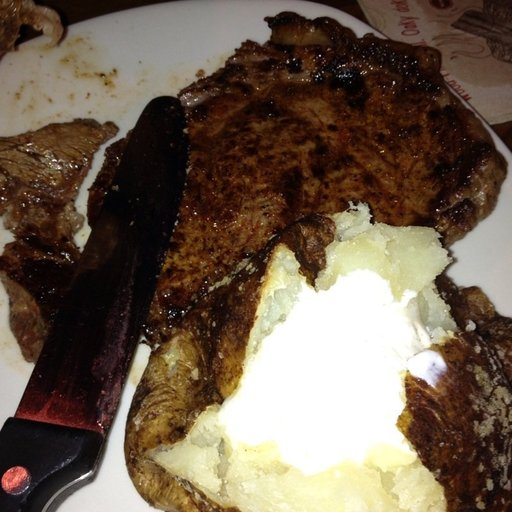

In [29]:
train_data_custom.load_image(143)

### 5.3 Create a function to display random images
1. Take in a `Dataset` and a number of other parameters such as class names and how many images to visualize.
2. To prevent the display getting out of hand, let's cap the number of images to see at 10.
3. Set the random seed for reproducibility
4. Get a list of random sample indexes from the target dataset
5. Setup a matplotlib plot
6. Loop Through the random sample images and plot them with matplotlib
7. Make sure the dimensions of our image line up with matplotlib

In [30]:
# 1. Create a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool=True,
                          seed: int=None):
  # 2. Adjust display if n is too high
  if n > 10:
    n = 10
    display_shape = False
    print(f"For display, purposes, n shouldn't be larger than 10")

  # 3. Seed the random seed
  if seed:
    random.seed(seed)

  # 4. Get random sample indexes
  random_samples_idx = random.sample(range(len(dataset)),k=n)

  # 5. Setup the plot function
  plt.figure(figsize=(16, 8))

  # 6. Loop through random indexes and plot them with matplotlib
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    # 7. Adjust tensor dimensions for plotting
    targ_image_adjust = targ_image.permute(1, 2, 0)

    # Plot adjusted samples
    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis(False)
    if classes:
      title = f"Class:{classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"
    plt.title(title)



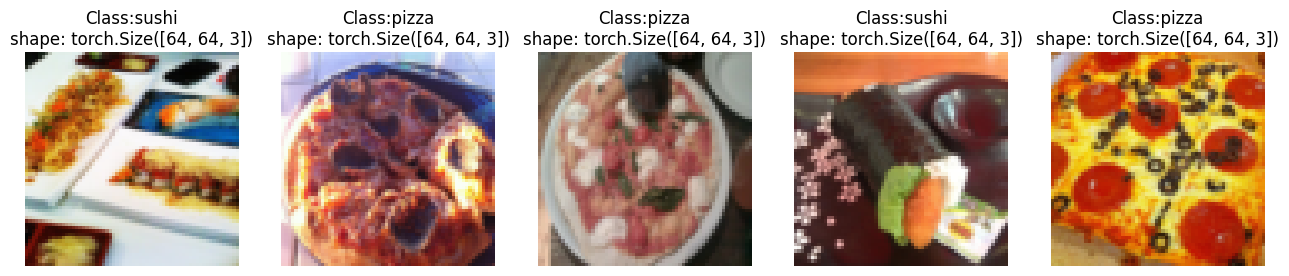

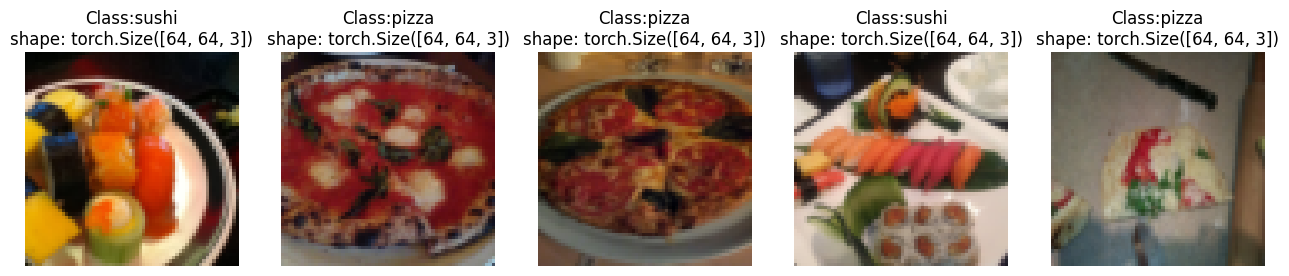

In [31]:
# Display random images from the ImageFolder Created Dataset
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=42
                      )
display_random_images(train_data_custom,
                      n=5,
                      classes=class_names,
                      seed=42)

In [32]:
train_data_custom

### Turn custom loaded images into `DataLoader`





In [34]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=False)



In [35]:
img_custom, label_custom = next(iter(train_dataloader_custom))

img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))